In [ ]:
#Linear Regression is a ML Method where it is used to fit a straight line to the data, allowing to make predict a dependent variable from one or more independent variables

#Learning in Linear Regression in nothing but iteratively updating the parameters like slope and bias term in the direction that reduces prediction error, based on feedback from the loss function

# w is slope and b is bias term (noise)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
x=2*np.random.rand(100,1)
true_w=2
true_b=5
noise=np.random.randn(100,1)
y=true_w*x+true_b+noise

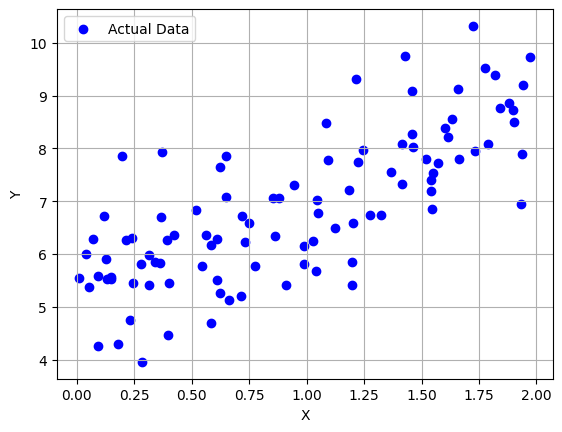

In [16]:
plt.scatter(x,y,color='blue',label='Actual Data')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()

In [17]:
def predict(x,w,b):
    return w*x+b
curr_w=0
curr_b=0
y_pred=predict(x,curr_w,curr_b)

C:\Users\akshi\AppData\Local\Temp\ipykernel_4412\2391000478.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


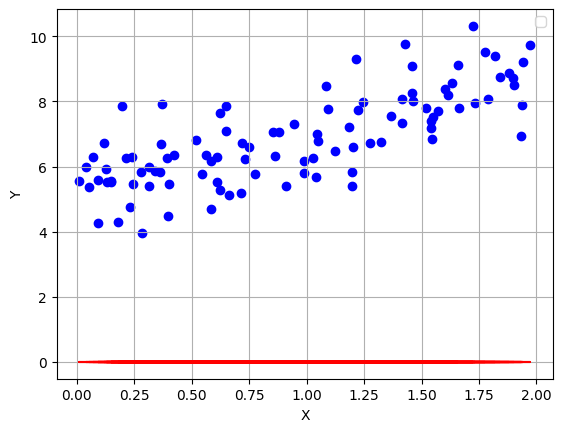

In [18]:
plt.scatter(x,y,color='blue')
plt.plot(x,y_pred,color='red')
plt.xlabel('X')
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()

In [19]:
def loss_function(y_pred,y):
    n=len(y)
    loss=(1/n)*np.sum((y_pred-y)**2)
    return loss
loss_value=loss_function(y_pred,y)
print("Initial Loss",loss_value)

Initial Loss 49.23416323573263


In [20]:
def compute_gradients(x,y,y_pred):
    n=len(y)
    dw=(2/n)*np.sum((y_pred-y)*x)
    db=(2/n)*np.sum(y_pred-y)
    return dw,db
dw,db=compute_gradients(x,y,y_pred)
print("Gradient dw",dw)
print("Gradient db",db)

Gradient dw -14.17940908165524
Gradient db -13.759285226690961


In [21]:
learning_rate=0.1
iterations=1000
w=0
b=0
loss_history=[]
for i in range(iterations):
    y_pred=predict(x,w,b)
    loss=loss_function(y_pred,y)
    loss_history.append(loss)
    dw,db=compute_gradients(x,y,y_pred)
    w=w-(learning_rate*dw)
    b=b-(learning_rate*db)
print(f"FINAL RESULT: w = {w:.4f}, b = {b:.4f}")
print(f"TRUE VALUES:  w = {true_w}, b = {true_b}")

FINAL RESULT: w = 1.7701, b = 5.2151
TRUE VALUES:  w = 2, b = 5


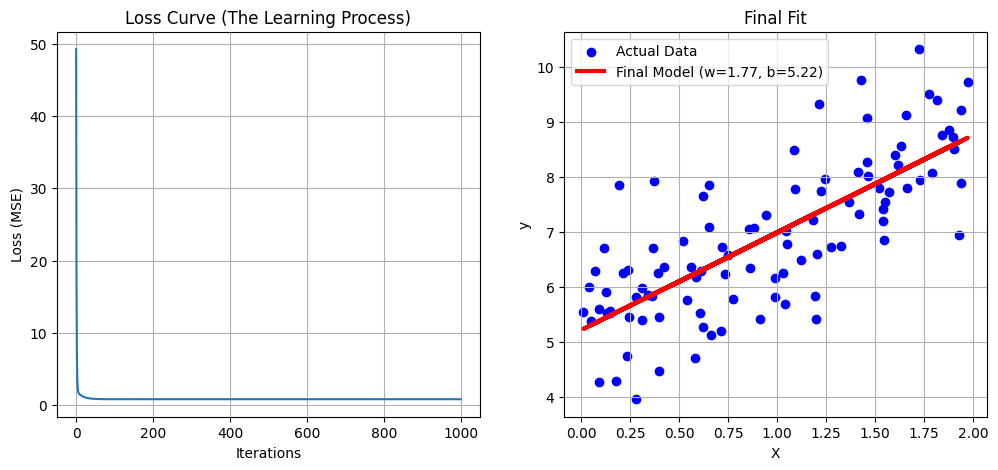

In [22]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('Loss Curve (The Learning Process)')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.subplot(1, 2, 2)
plt.scatter(x, y, color='blue', label='Actual Data')
y_final_pred = predict(x, w, b)
plt.plot(x, y_pred, color='red', linewidth=3, label=f'Final Model (w={w:.2f}, b={b:.2f})')
plt.title('Final Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# High Learning Rate (Large Steps)
high_lr=2.1
high_w=0
high_b=0
for i in range(iterations):
    y_pred=predict(x,high_w,high_b)
    loss=loss_function(y_pred,y)
    dw,db=compute_gradients(x,y,y_pred)
    high_w=high_w-(high_lr*dw)
    high_b=high_b-(high_lr*db)
    if i%100==0:
        print(f"Step {i}: Loss = {loss} and Slope(w) = {high_w} and Bias(b) = {high_b}")

Step 0: Loss = 49.23416323573263 and Slope(w) = 29.776759071476008 and Bias(b) = 28.89449897605102
Step 100: Loss = 4.654627869276149e+178 and Slope(w) = 8.635569159173877e+89 and Bias(b) = 7.624738182615395e+89
Step 200: Loss = inf and Slope(w) = 2.7131077203720097e+178 and Bias(b) = 2.3955266465665214e+178
Step 300: Loss = inf and Slope(w) = 8.52399345852311e+266 and Bias(b) = 7.526222903619545e+266
Step 400: Loss = nan and Slope(w) = nan and Bias(b) = nan
Step 500: Loss = nan and Slope(w) = nan and Bias(b) = nan
Step 600: Loss = nan and Slope(w) = nan and Bias(b) = nan
Step 700: Loss = nan and Slope(w) = nan and Bias(b) = nan
Step 800: Loss = nan and Slope(w) = nan and Bias(b) = nan
Step 900: Loss = nan and Slope(w) = nan and Bias(b) = nan


C:\Users\akshi\AppData\Local\Temp\ipykernel_4412\3346642892.py:3: RuntimeWarning: overflow encountered in square
  loss=(1/n)*np.sum((y_pred-y)**2)
C:\Users\akshi\AppData\Local\Temp\ipykernel_4412\408627369.py:9: RuntimeWarning: invalid value encountered in scalar subtract
  high_w=high_w-(high_lr*dw)
C:\Users\akshi\AppData\Local\Temp\ipykernel_4412\408627369.py:10: RuntimeWarning: invalid value encountered in scalar subtract
  high_b=high_b-(high_lr*db)


In [27]:
# Low Learning Rate (Small Steps)
low_lr=0.0001
low_w=0
low_b=0
for i in range(iterations):
    y_pred=predict(x,low_w,low_b)
    loss=loss_function(y_pred,y)
    dw,db=compute_gradients(x,y,y_pred)
    low_w=low_w-(low_lr*dw)
    low_b=low_b-(low_lr*db)
    if i%100==0:
        print(f"Step {i}: Loss = {loss} and Slope(w) = {low_w} and Bias(b) = {low_b}")

Step 0: Loss = 49.23416323573263 and Slope(w) = 0.001417940908165524 and Bias(b) = 0.0013759285226690962
Step 100: Loss = 45.48624627887655 and Slope(w) = 0.14017854816390232 and Bias(b) = 0.13626915495930345
Step 200: Loss = 42.034905048733044 and Slope(w) = 0.2730961993915454 and Bias(b) = 0.2659614350931059
Step 300: Loss = 38.85662609493249 and Slope(w) = 0.40040811580634267 and Bias(b) = 0.3906623644571977
Step 400: Loss = 35.9297604931799 and Slope(w) = 0.5223419162620281 and Bias(b) = 0.5105730597399264
Step 500: Loss = 33.234375993444154 and Slope(w) = 0.6391160058431611 and Bias(b) = 0.6258865018924096
Step 600: Loss = 30.75212089240512 and Slope(w) = 0.7509399487320764 and Bias(b) = 0.7367878653514124
Step 700: Loss = 28.4660987004555 and Slope(w) = 0.8580148259868146 and Bias(b) = 0.8434548339394344
Step 800: Loss = 26.360752747277918 and Slope(w) = 0.9605335788406496 and Bias(b) = 0.9460579039811455
Step 900: Loss = 24.42175993789434 and Slope(w) = 1.0586813381091145 and Bi

In [28]:
#what is learning?
#    Learning is nothing but iteratively updating the parameters the weight and slope by reducing the error such that the algorithm finds a best fitting line for the data
#

Object `learning` not found.
